Nesse experimento um ECoG registra o sinal de EEG de um macaco em três situações: 

- Olhos abertos
- Olhos fechados
- Anestesiado

O ECoG usa 128 canais, cada canal é um arquivo matlab, a taxa de amostragem é de 1000Hz e o experimento foi dividido em 2 partes. Na primeira o macaco está de olhos abertos e fechados e na segunda parte é aplicada anestesia. O arquivo ECoGTime.mat possui a variável tempo apenas. O Condition.mat possui 3 variáveis: ConditionLabel, ConditionIndex e ConditionTime. O ConditionLabel tem os nomes da condição que o macaco se encontra e ConditionIndex e ConditionTime indicam o início e o final de cada condição.


In [34]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat 
from scipy.signal import decimate
from numpy.fft import fft, rfft
import scipy.signal as ssig
from nitime.algorithms import multi_taper_psd
from nitime.utils import dpss_windows
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, xlim, ylim, show, imshow, xlabel, ylabel, bar, figure, title
from matplotlib import rcParams
from numpy import hanning, where, histogram, arange
rcParams['figure.figsize'] = (12,3)


In [35]:
#Questão 1

data1 = sio.loadmat('Session1/Condition.mat')
data2 = sio.loadmat('Session2/Condition.mat')

time1 = sio.loadmat('Session1/ECoGTime.mat')['ECoGTime'][0]
time2 = sio.loadmat('Session2/ECoGTime.mat')['ECoGTime'][0]

ConditionTime1 = data1['ConditionTime']
ConditionTime2 = data2['ConditionTime']

ECoG1_1 = sio.loadmat('Session1/ECoG_ch1.mat')['ECoGData_ch1'][0]
ECoG55_1 = sio.loadmat('Session1/ECoG_ch55.mat')['ECoGData_ch55'][0]
ECoG115_1 = sio.loadmat('Session1/ECoG_ch115.mat')['ECoGData_ch115'][0]


ECoG1_2 = sio.loadmat('Session2/ECoG_ch1.mat')['ECoGData_ch1'][0]
ECoG55_2 = sio.loadmat('Session2/ECoG_ch55.mat')['ECoGData_ch55'][0]
ECoG115_2 = sio.loadmat('Session2/ECoG_ch115.mat')['ECoGData_ch115'][0]


In [36]:
T1 = time1[-1]
T2 = time2[-1]
fs = 1000
N1 = T1 * fs
N2 = T2 * fs
df1 = 1/T1
df2 = 1/T2
dt1 = time1[1]-time1[0]
dt2 = time2[1]-time2[0]
fNQ1 = 1/ dt1 /2
fNQ2 = 1/ dt2 /2

In [37]:
data1

{'ConditionIndex': array([[  40908, 1245012, 1439473, 2635603]], dtype=int32),
 'ConditionLabel': array([[array(['AwakeEyesOpened-Start'], dtype='<U21'),
         array(['AwakeEyesOpened-End'], dtype='<U19'),
         array(['AwakeEyesClosed-Start'], dtype='<U21'),
         array(['AwakeEyesClosed-End'], dtype='<U19')]], dtype=object),
 'ConditionTime': array([[  40.907, 1245.011, 1439.472, 2635.602]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jun 09 23:00:54 2014',
 '__version__': '1.0'}

In [38]:
data2

{'ConditionIndex': array([[  79146,  659727, 2463531]], dtype=int32),
 'ConditionLabel': array([[array(['AnestheticInjection'], dtype='<U19'),
         array(['Anesthetized-Start'], dtype='<U18'),
         array(['Anesthetized-End'], dtype='<U16')]], dtype=object),
 'ConditionTime': array([[  79.145,  659.726, 2463.53 ]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jun 09 23:02:23 2014',
 '__version__': '1.0'}

In [39]:
# Qual a duração total de cada condição ? 


print ('Tempo total da condição olhos abertos:', ConditionTime1 [0][1]-ConditionTime1[0][0])
print ('Tempo total da condição olhos fechados:', ConditionTime1 [0][3]-ConditionTime1[0][2])
print ('Tempo total da condição anestesia:', ConditionTime2 [0][2]-ConditionTime2[0][1])

Tempo total da condição olhos abertos: 1204.104
Tempo total da condição olhos fechados: 1196.1299999999999
Tempo total da condição anestesia: 1803.804


In [40]:
#Qual a resolução da frequência  e a frequência de Nyquist?

print('A resulução da frequência na sessão 1 é', df1 , 'e a frequência de Nyquist é',fNQ1)
print('A resulução da frequência na sessão 2 é', df2 , 'e a frequência de Nyquist é',fNQ2)

A resulução da frequência na sessão 1 é 0.00037806011307021866 e a frequência de Nyquist é 500.0
A resulução da frequência na sessão 2 é 0.00038430335984898417 e a frequência de Nyquist é 500.0


Resposta: Sim, é possível observar rítmos em cada condição


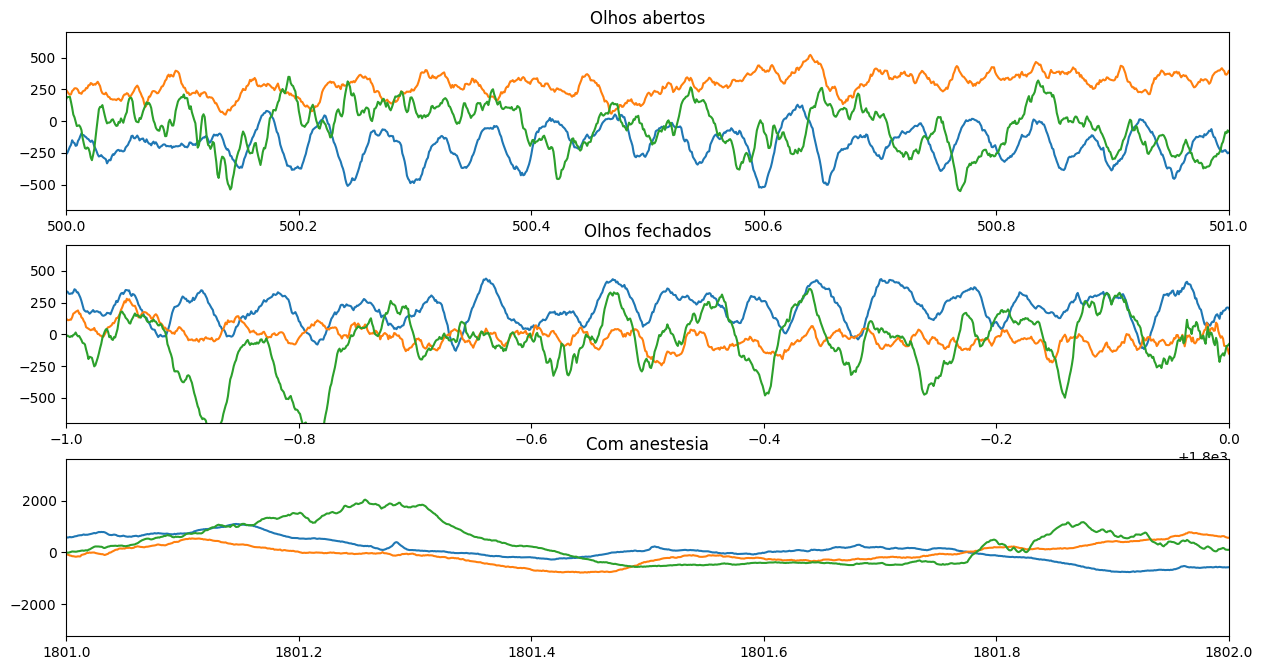

In [41]:
#Questão 2

#Crie um plot para cada condição e descreva se você consegue enxergar algum ritmo. 
#Plote apenas um intervalo curto se for necessário.

plt.figure(figsize=(15,8),dpi = 100)

plt.subplot(3,1,1)
plt.plot(time1,ECoG1_1)
plt.plot(time1,ECoG55_1)
plt.plot(time1,ECoG115_1)
plt.xlim (500,501)
plt.ylim (-700,700)
plt.title('Olhos abertos')


plt.subplot(3,1,2)
plt.plot(time1,ECoG1_1)
plt.plot(time1,ECoG55_1)
plt.plot(time1,ECoG115_1)
plt.xlim (1799,1800)
plt.ylim (-700,700)
plt.title('Olhos fechados')
plt.show

plt.subplot(3,1,3)
plt.plot(time2,ECoG1_2)
plt.plot(time2,ECoG55_2)
plt.plot(time2,ECoG115_2)
plt.xlim (1801,1802)
#plt.ylim (-700,700)
plt.title('Com anestesia')
plt.show

print('Resposta: Sim, é possível observar rítmos em cada condição')

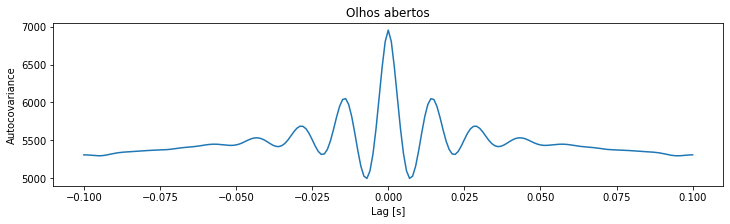

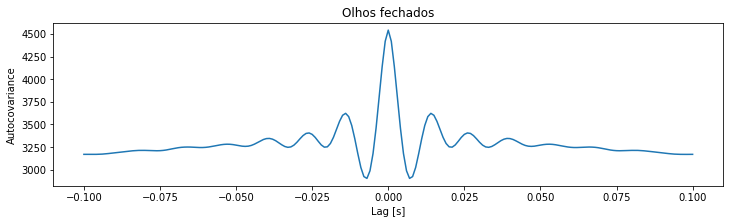

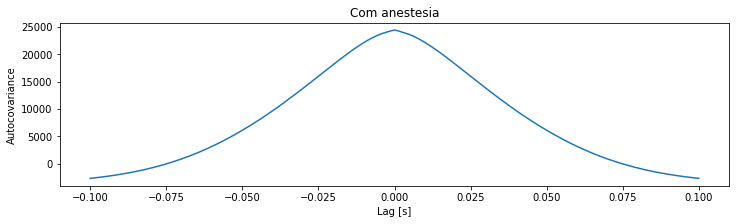

In [42]:
#Questão 3

#Plote a autocovariância para cada condição.

COA = ECoG1_1[40908: 1245012]
newCOA = decimate(COA,4)

COF =  ECoG1_1[1439473: 2635603]
newCOF = decimate(COF,4)

CAN = ECoG1_2[659727: 2463531]
newCAN = decimate(CAN,4)

lags = np.arange(-len(newCOA) + 1, len(newCOA))
ac = 1 / N1 * np.correlate(newCOA - newCOA.mean(), newCOA - newCOA.mean(), mode='full')
inds = abs(lags) <= 100          
plt.plot(lags[inds] * dt1, ac[inds])       
plt.xlabel('Lag [s]')                    
plt.ylabel('Autocovariance')
plt.title('Olhos abertos')
plt.show()

lags = np.arange(-len(newCOF) + 1, len(newCOF))
ac = 1 / N1 * np.correlate(newCOF - newCOF.mean(), newCOF - newCOF.mean(), mode='full')
inds = abs(lags) <= 100          
plt.plot(lags[inds] * dt1, ac[inds])       
plt.xlabel('Lag [s]')                    
plt.ylabel('Autocovariance')
plt.title('Olhos fechados')
plt.show()

lags = np.arange(-len(newCAN) + 1, len(newCAN))
ac = 1 / N2 * np.correlate(newCAN - newCAN.mean(), newCAN - newCAN.mean(), mode='full')
inds = abs(lags) <= 100          
plt.plot(lags[inds] * dt2, ac[inds])       
plt.xlabel('Lag [s]')                    
plt.ylabel('Autocovariance')
plt.title('Com anestesia')
plt.show()



ValueError: x and y must have same first dimension, but have shapes (1322541,) and (150513,)

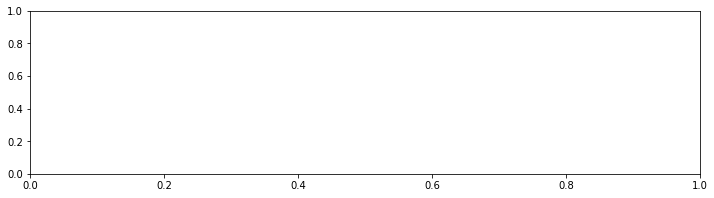

In [51]:
#Questão 4

#Plote o espectro para cada condição. 

dt11 = time1[2]-time1[1]
dt22 = time2[2]-time2[1]
fNQ11 = 1/ dt1 /2
fNQ22 = 1/ dt2 /2

xf = fft(newCOA - newCOA.mean())
Sxx = 2 * dt11 ** 2 / T1 * (xf * np.conj(xf))
Sxx = Sxx[:int(len(newCOA) / 2)]

faxis = np.arange(0,fNQ1,df1)
plt.plot(faxis, np.real(Sxx))
plt.xlim([0, 100])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.title('Olhos abertos')
plt.show()
'''

xf = fft(newCOF - newCOF.mean())
Sxx = 2 * dt1 ** 2 / T1 * (xf * np.conj(xf))
Sxx = Sxx[:int(len(newCOF) / 2)]

faxis = np.arange(0,fNQ1,df1)
plt.plot(faxis, np.real(Sxx))
plt.xlim([0, 100])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.title('Olhos fechados')
plt.show()

xf = fft(newCAN - newCAN.mean())
Sxx = 2 * dt2 ** 2 / T2 * (xf * np.conj(xf))
Sxx = Sxx[:int(len(newCAN) / 2)]

faxis = np.arange(0,fNQ2,df2)
plt.plot(faxis, np.real(Sxx))
plt.xlim([0, 100])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.title('Com anestesia')
plt.show()
'''



#Existe a necessidade de passar algum filtro? Provavelmente terá 60 Hz nos canais, caso tenha, passe um filtro e calcule novamente o espectro.

In [45]:
#Questão 5


#Existe diferenças espectrais entre as condições?

In [ ]:
#Questão 6
#Calcule o espectrograma para todo o sinal, os tempos das mudanças de condições batem com o que foi relatado no ConditionTime?

In [ ]:
#Questão 7
#Calcule os espectros usando o método multitaper. Justifique sua escolha do número de tapers em relação à resolução da frequência. Alguma nova frequência ficou aparente?

In [ ]:
#Questão 8
#Para cada condição, divida o sinal em trechos de 1s, calcule a coerência entre os eletrodos. Existe mudança entre acoplamento entre os eletrodos?